# Class definitions

In [27]:
import numpy as np
import matplotlib.pyplot as plt


class SpatialRobot:
    def __init__(self, joint_angles, link_lengths, alpha, d, color="red"):
        """
        Initialize the robot with given joint angles, link lengths, twists, and offsets.
        """
        assert (
            len(joint_angles) == len(link_lengths) == len(alpha) == len(d)
        ), "Number of parameters must match"

        self.joint_angles = joint_angles  # List of joint angles (theta) in radians
        self.link_lengths = link_lengths  # List of link lengths (a)
        self.alpha = alpha  # List of link twists (alpha)
        self.d = d  # List of link offsets (d)
        self.color = color  # Color of the robot

    def dh_transform(self, a, alpha, d, theta):
        """
        Calculate the 3D transformation matrix for a given joint using DH parameters.
        """
        return np.array(
            [
                [
                    np.cos(theta),
                    -np.sin(theta) * np.cos(alpha),
                    np.sin(theta) * np.sin(alpha),
                    a * np.cos(theta),
                ],
                [
                    np.sin(theta),
                    np.cos(theta) * np.cos(alpha),
                    -np.cos(theta) * np.sin(alpha),
                    a * np.sin(theta),
                ],
                [0, np.sin(alpha), np.cos(alpha), d],
                [0, 0, 0, 1],
            ]
        )

    def forward_kinematics(self):
        """
        Perform forward kinematics to compute the (x, y, z) position of each joint.
        """
        n = len(self.joint_angles)  # Number of joints/links
        T = np.eye(4)  # Start with an identity matrix for the base frame

        # Store each link's end point for plotting
        points = [[0, 0, 0]]  # Start at the origin

        # Compute the transformation for each joint
        for i in range(n):
            Ti = self.dh_transform(
                self.link_lengths[i], self.alpha[i], self.d[i], self.joint_angles[i]
            )
            T = T @ Ti  # Update the transformation matrix
            # Get the (x, y, z) position of the end-effector after this joint
            x, y, z = T[0, 3], T[1, 3], T[2, 3]
            points.append([x, y, z])

        return np.array(points)

    def get_max_reach(self):
        """
        Calculate the maximum reach of the robot (i.e., the total length of the robot's arm).
        """
        return sum(self.link_lengths)

    def plot(self, ax):
        """
        Plot the robot's configuration in 3D based on forward kinematics.
        """
        points = self.forward_kinematics()  # Get the (x, y, z) positions of the joints

        # Extract x, y, z coordinates
        x = points[:, 0]
        y = points[:, 1]
        z = points[:, 2]

        # Plot the robot as a series of lines between the points
        ax.plot(x, y, z, "-o", color=self.color, markersize=8, linewidth=4)


def plot_multiple_spatial_robots(*robots):
    """
    Function to plot multiple robots in 3D on the same graph with improved clarity.
    Each robot is an instance of the Robot3D class.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    max_reach = 0

    # Plot each robot by calling its plot function and compute max reach
    for robot in robots:
        robot.plot(ax)
        max_reach = max(max_reach, robot.get_max_reach())  # Update max reach if needed

    # Set plot limits dynamically based on the maximum reach of the robots
    limit = max_reach  # Add more margin for better visualization
    ax.set_xlim([-limit, limit])
    ax.set_ylim([-limit, limit])
    ax.set_zlim([-limit, limit])

    # Add Cartesian coordinate axes
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("Multiple 3D Robots Visualization")

    # Adjust the view for better clarity
    ax.view_init(elev=30, azim=45)

    plt.show()


class PlanarRobot:
    def __init__(self, joint_angles, link_lengths, color="red"):
        """
        Initialize the robot with given joint angles, link lengths, and color.
        """
        assert len(joint_angles) == len(
            link_lengths
        ), "Number of joint angles and link lengths must match"

        self.joint_angles = joint_angles  # List of joint angles (radians)
        self.link_lengths = link_lengths  # List of link lengths
        self.color = color  # Color of the robot

    def dh_transform(self, a, theta):
        """
        Calculate the 2D transformation matrix for a given joint.
        """
        return np.array(
            [
                [np.cos(theta), -np.sin(theta), a * np.cos(theta)],
                [np.sin(theta), np.cos(theta), a * np.sin(theta)],
                [0, 0, 1],
            ]
        )

    def forward_kinematics(self):
        """
        Perform forward kinematics to compute the (x, y) position of each joint.
        """
        n = len(self.joint_angles)  # Number of joints/links
        T = np.eye(3)  # Start with an identity matrix for the base frame

        # Store each link's end point for plotting
        points = [[0, 0]]  # Start at the origin

        # Compute the transformation for each joint
        for i in range(n):
            Ti = self.dh_transform(self.link_lengths[i], self.joint_angles[i])
            T = T @ Ti  # Update the transformation matrix
            # Get the (x, y) position of the end-effector after this joint
            x, y = T[0, 2], T[1, 2]
            points.append([x, y])

        return np.array(points)

    def get_max_reach(self):
        """
        Calculate the maximum reach of the robot (i.e., the total length of the robot's arm).
        """
        return sum(self.link_lengths)

    def plot(self):
        """
        Plot the robot's configuration based on forward kinematics.
        """
        points = self.forward_kinematics()  # Get the (x, y) positions of the joints

        # Extract x and y coordinates
        x = points[:, 0]
        y = points[:, 1]

        # Plot the robot as a series of lines between the points
        plt.plot(x, y, "-o", color=self.color, markersize=8, linewidth=4)


# Create a function to handle plotting multiple robots together
def plot_multiple_planar_robots(*robots):
    """
    Function to plot multiple robots on the same graph.
    Each robot is an instance of the PlanarRobot class.
    """
    max_reach = 0

    # Plot each robot by calling its plot function and compute max reach
    for robot in robots:
        robot.plot()
        max_reach = max(max_reach, robot.get_max_reach())  # Update max reach if needed

    # Add Cartesian coordinate axes (X and Y axes)
    plt.axhline(0, color="black", linewidth=1)  # X-axis
    plt.axvline(0, color="black", linewidth=1)  # Y-axis

    # Set plot limits dynamically based on the maximum reach of the robots
    limit = max_reach * 1  # Add 20% margin for better visualization
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Multiple Planar Robots Visualization")

    plt.show()

## Punctiform robot

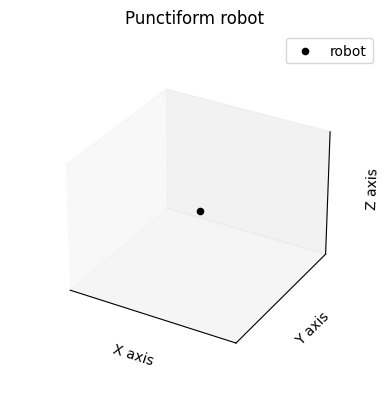

In [35]:
import matplotlib.pyplot as plt

# Create a 3D plot with axis labels and a legend
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Coordinates of the dot
x, y, z = 0, 0, 0

# Plot the black dot
sc = ax.scatter(x, y, z, color="black", label="robot")

# Add axis labels
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# Add a legend in the upper right corner
ax.legend(loc="upper right")

# Set limits for better visualization
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_title("Punctiform robot")
ax.set_box_aspect(aspect=None, zoom=0.8)  # zoom out to show the z label
# Show the plot
plt.show()

## Roomba example with symmetry

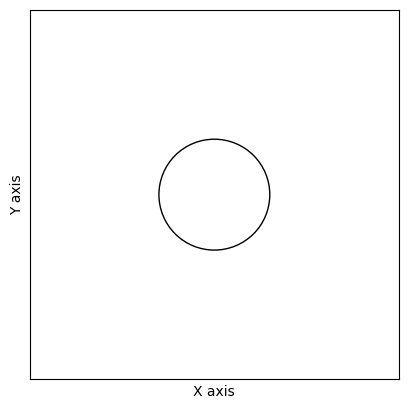

In [41]:
import matplotlib.pyplot as plt

# Create a 2D plot with a circle
fig, ax = plt.subplots()

# Define the center and radius of the circle
circle = plt.Circle((0, 0), 0.3, color="black", fill=False)

# Add the circle to the plot
ax.add_artist(circle)

# Set equal scaling to maintain the aspect ratio of the circle
ax.set_aspect("equal")

# Set limits for the plot
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

# Remove grid and axis ticks
ax.grid(False)

ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")

ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

## Roomba example without symmetry

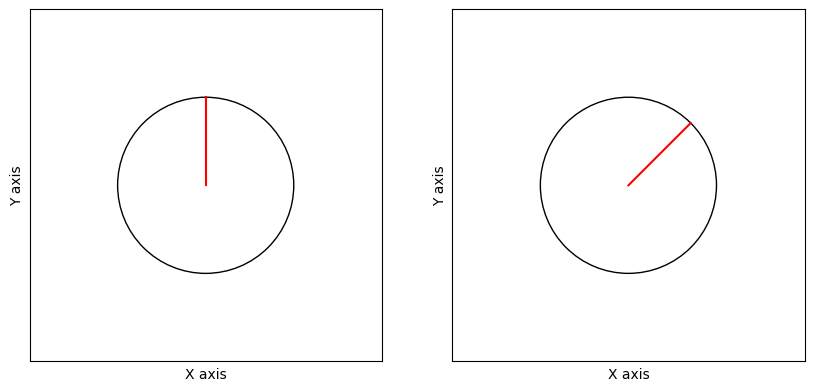

In [48]:
import matplotlib.pyplot as plt  # Create a 2D plot with a circle
import numpy as np

# Create a 2D plot with two circles, ticks, and axis labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First circle (left plot)
circle1 = plt.Circle((0, 0), 0.5, fill=False)
ax1.add_artist(circle1)

# Tick inside the first circle
ax1.plot([0, 0], [0.5, 0], color="red")  # vertical tick

# Set equal scaling and limits for the first plot
ax1.set_aspect("equal")
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])

# Add axis labels to the first plot
ax1.set_xlabel("X axis")
ax1.set_ylabel("Y axis")

# Remove grid and axis ticks for the first plot
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

# Second circle (right plot) with rotation
circle2 = plt.Circle((0, 0), 0.5, fill=False)
ax2.add_artist(circle2)

# Create a rotated tick for the second circle (rotation of 45 degrees)
rotation_angle = np.radians(45)
tick_length = 0.5
x_rotated = tick_length * np.cos(rotation_angle)
y_rotated = tick_length * np.sin(rotation_angle)

# Plot the rotated tick
ax2.plot([0, x_rotated], [0, y_rotated], color="red")

# Set equal scaling and limits for the second plot
ax2.set_aspect("equal")
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])

# Add axis labels to the second plot
ax2.set_xlabel("X axis")
ax2.set_ylabel("Y axis")

# Remove grid and axis ticks for the second plot
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])

# Show the plot
plt.show()

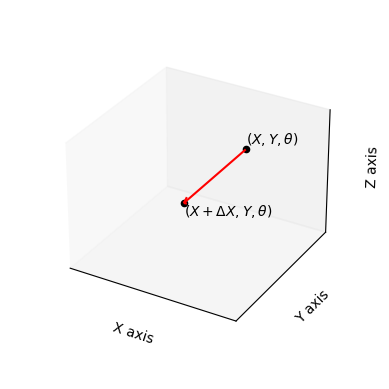

In [64]:
import matplotlib.pyplot as plt

# Create a 3D plot for the dot's movement
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Coordinates of the initial and final positions of the dot
x_start, y_start, z_start = 3, 6, 0
x_end, y_end, z_end = 3, 2, 0  # Moving along the x-direction

# Plot the initial and final points
ax.scatter(x_start, y_start, z_start, color="black", label="Start Point")
ax.scatter(x_end, y_end, z_end, color="black", label="End Point")

# Add labels for the points
ax.text(x_start, y_start, z_start + 0.1, r"$(X, Y, \theta)$", color="black")
ax.text(x_end, y_end, z_end - 0.2, r"$(X + \Delta X, Y, \theta)$", color="black")

# Plot an arrow to represent the trajectory along the x-direction
ax.quiver(
    x_start,
    y_start,
    z_start,
    x_end - x_start,
    y_end - y_start,
    z_end - z_start,
    color="red",
    arrow_length_ratio=0.05,
)

# Set equal scaling for better visualization
ax.set_box_aspect([1, 1, 1])  # Aspect ratio is 1:1:1

# Set labels for the axes
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# Set limits for better visualization
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([-1, 1])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove grid for a cleaner look
ax.grid(False)

ax.set_box_aspect(aspect=None, zoom=0.8)  # zoom out to show the z label
# Show the plot
plt.show()

## N Joints manipulator

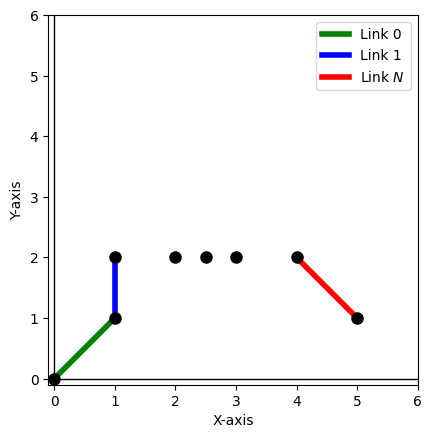

In [144]:
import matplotlib.pyplot as plt

# Plot settings
plt.axhline(0, color="black", linewidth=1)  # X-axis
plt.axvline(0, color="black", linewidth=1)  # Y-axis
limit = 6
plt.xlim(-0.1, limit)
plt.ylim(-0.1, limit)
plt.gca().set_aspect("equal", adjustable="box")


plt.plot([0, 1], [0, 1], color="green", linewidth=4, label="Link 0")
plt.plot([1, 1], [1, 2], color="blue", linewidth=4, label="Link 1")
plt.plot([4, 5], [2, 1], color="red", linewidth=4, label=r"Link $N$")

plt.plot(0, 0, "-o", color="black", markersize=8, linewidth=4)
plt.plot(1, 1, "-o", color="black", markersize=8, linewidth=4)
plt.plot(1, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(2, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(2.5, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(3, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(4, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(5, 1, "-o", color="black", markersize=8, linewidth=4)


# Add a legend in the upper right corner
plt.legend(loc="upper right")

# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show plot
plt.show()

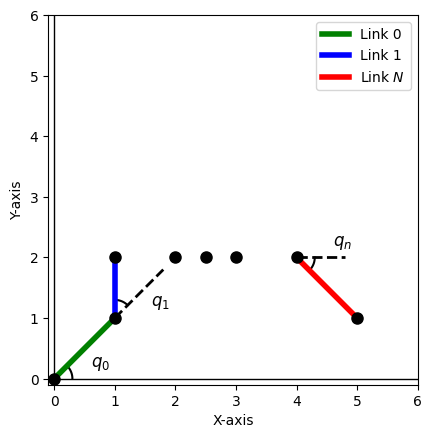

In [174]:
import matplotlib.pyplot as plt
import numpy as np

# Plot settings
plt.axhline(0, color="black", linewidth=1)  # X-axis
plt.axvline(0, color="black", linewidth=1)  # Y-axis
limit = 6
plt.xlim(-0.1, limit)
plt.ylim(-0.1, limit)
plt.gca().set_aspect("equal", adjustable="box")


# Function to plot angles
def plot_angle(x, y, start_angle, end_angle, radius=0.3, label=""):
    # Calculate the angle arc between the two angles
    theta = np.linspace(start_angle, end_angle, 100)
    arc_x = radius * np.cos(theta) + x
    arc_y = radius * np.sin(theta) + y
    plt.plot(arc_x, arc_y, "black")
    plt.text(x + 0.3 + radius, y - 0.1 + radius, label, fontsize=12)


# Plot the angles between the links
plot_angle(0, 0, 0, np.pi / 4, label=r"$q_0$")  # Angle between Link 0 and X-axis
plot_angle(
    1, 1, np.pi / 4, np.pi / 2, label=r"$q_1$"
)  # Angle between Link 1 and dashed line q1
plot_angle(
    4, 2, -np.pi / 4, 0, label=r"$q_n$"
)  # Angle between Link N and dashed line qn

# Plot the links
plt.plot([0, 1], [0, 1], color="green", linewidth=4, label="Link 0")
plt.plot([1, 1], [1, 2], color="blue", linewidth=4, label="Link 1")
plt.plot([4, 5], [2, 1], color="red", linewidth=4, label=r"Link $N$")

# Plot the dashed lines for q1 and qn
plt.plot([1, 1.8], [1, 1.8], "--", color="black", linewidth=2)
plt.plot([4, 4.8], [2, 2], "--", color="black", linewidth=2)

# Plot the joints
plt.plot(0, 0, "-o", color="black", markersize=8, linewidth=4)
plt.plot(1, 1, "-o", color="black", markersize=8, linewidth=4)
plt.plot(1, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(2, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(2.5, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(3, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(4, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(5, 1, "-o", color="black", markersize=8, linewidth=4)


# Add a legend in the upper right corner
plt.legend(loc="upper right")

# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show plot
plt.show()

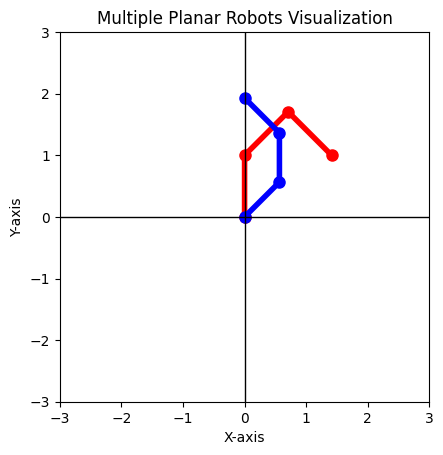

In [26]:
# Example usage of the PlanarRobot class:

# Define joint angles (in radians) and link lengths for two robots
joint_angles_1 = np.radians([90, -45, -90])  # Robot 1's joint angles
link_lengths_1 = [1.0] * len(joint_angles_1)  # Robot 1's link lengths

joint_angles_2 = np.radians([45, 45, 45])  # Robot 2's joint angles
link_lengths_2 = [0.8] * len(joint_angles_2)  # Robot 2's link lengths

# Create robot instances with different configurations and colors
robot1 = PlanarRobot(joint_angles_1, link_lengths_1, color="red")
robot2 = PlanarRobot(joint_angles_2, link_lengths_2, color="blue")

# Plot both robots on the same graph with dynamic limits based on their total reach
plot_multiple_planar_robots(robot1, robot2)

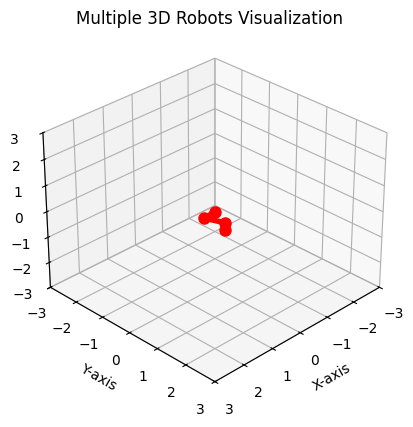

In [22]:
# Example usage of the Robot3D class:

# Define joint angles (theta), link lengths (a), link twists (alpha), and offsets (d) for two robots
joint_angles_1 = np.radians(
    [
        30,
        45,
        -30,
    ]
)  # Robot 1's joint angles
link_lengths_1 = [1.0] * len(joint_angles_1)  # Robot 1's link lengths
alpha_1 = np.radians(
    [
        0,
        0,
        0,
    ]
)  # Robot 1's link twists (alpha)
d_1 = [0.5] * len(joint_angles_1)  # Robot 1's link offsets


# Create robot instances with different configurations and colors
robot = SpatialRobot(joint_angles_1, link_lengths_1, alpha_1, d_1, color="red")

# Plot both robots on the same 3D graph with dynamic limits based on their total reach
plot_multiple_spatial_robots(robot)